Validation Curves refer to an algorithm's achieved performance, given different hyperpameters. For each hyperparameter value, we will perform k-fold cross validations and stor the in-sample performance and out-of-sample performance

We then calcualte and plot the mean and standard deviation of in-sample and out-of-sample performance for each hyperparameter value.

By examining the relative and absolute performance, we can gauge the level of bias and variance in our model.

In [1]:
# Step 1: Importing libraries and data
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
bc = load_breast_cancer()

Next we will define our feature and targets (x and y) as well as our base learnner. Furthermore, we will define our parameter search space with param_range = [2,3,4,5] and use validation_curve

In order to use it, we must define our base learner, our features, targets, the parameter's anme that we wish to test, as well as the parameter's values to test


Furthermore, we will define the corss-validation's K folds with cv=10 as well as the metric that we wish to calculate with scoring = "accuracy"

In [3]:
# Step 2: We will create in-sample and out-of-sample scores
x, y = bc.data, bc.target
learner = KNeighborsClassifier()
param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(learner, x, y, param_name='n_neighbors', param_range=param_range, cv=10,scoring = "accuracy" )

Next we will calcualte the mean and standard deviation for both in-sample performance (train_scores) as well as out-of-sample performance (test_scores)

In [4]:
# Step 3: Calculate the average and standard deviation for each hyperparameter
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Finally we will plot the means and deviations. We plot the means as curves, using plt.plot.


In order to plot the standard deviations, we need to create a transparent rectangle surrounding the curves, with a width equal to the standard deviation at each hyperparameter value point.

This is achieved iwth the use of plt.fill_between, by passing the value points as the first parameter, the lowest rectangle's point as the second parameter, and the highest point as the third.


Furthermore, alpha = 0.1, instructs matplotlib to make the rectangle transparent (combining the rectangle's color with the background in a 10%- 90% ratio, respectively)

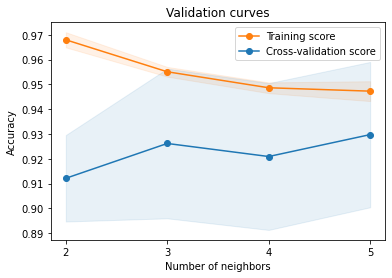

In [5]:
# step 4: Plot the scores
plt.figure()
plt.title('Validation curves')
# ------------------------------------------Plot the standard deviation-----------------------------------------------
plt.fill_between(param_range, train_scores_mean-train_scores_std,train_scores_mean + train_scores_std,  alpha = 0.1, color="C1")
plt.fill_between(param_range, test_scores_mean-test_scores_std,test_scores_mean + test_scores_std,  alpha = 0.1, color="C0")
# ------------------------------------------Plot the means-----------------------------------------------
plt.plot(param_range, train_scores_mean, 'o-', color='C1', label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color='C0', label="Cross-validation score")
plt.xticks(param_range)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

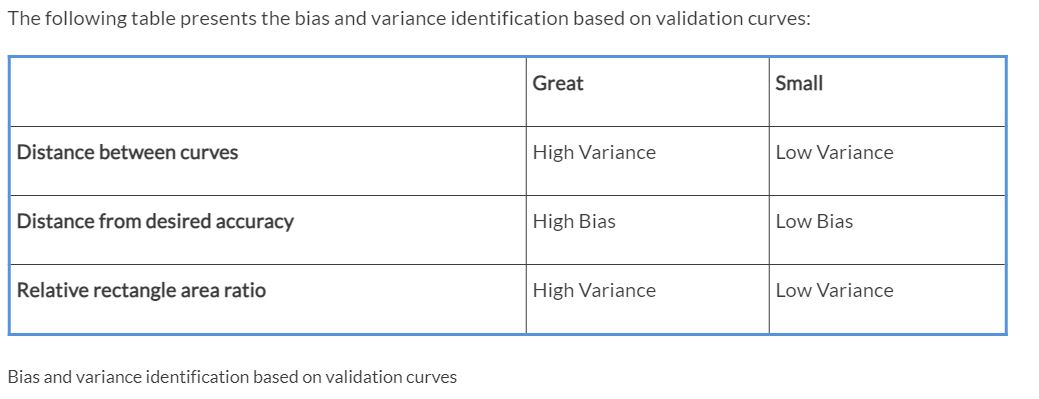

As the curves close the distance between them, the variance generally reduces. 

The further away they both are from the desired accuracy (taking into account the irreduciable error), the bias increases.